# Forecast skill 

This notebook contains a summary of some skill results to date

In [1]:
import xarray as xr

from src import plot

/g/data/xv83/users/ds0092/software/miniconda3/envs/forecast_analysis/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [3]:
SKILL_DIR = "../../data/skill/"

## Sea surface temperature
### Anomaly correlation coefficient relative to HadISST

In [4]:
f6_annual_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CAFEf6.HadISST.annual.anom_1991-2020.sst.rXY_1991-2020.zarr"
).compute()

f6_4year_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CAFEf6.HadISST.4-year.anom_1991-2020.sst.rXY_1991-2020.zarr"
).compute()

/jobfs/36683315.gadi-pbs/ipykernel_1569466/2099662744.py:5: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  f6_4year_rXY = xr.open_zarr(


GroupNotFoundError: group not found at path ''

In [260]:
can_annual_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.annual.anom_1985-2014.sst.rXY_1985-2014.zarr"
).compute()

can_4year_rXY = xr.open_zarr(
    f"{SKILL_DIR}/CanESM5.HadISST.4-year.anom_1985-2014.sst.rXY_1985-2014.zarr"
).compute()

In [ ]:
ec_annual_rXY = xr.open_zarr(
    f"{SKILL_DIR}/EC_Earth3.HadISST.annual.anom_1985-2014.sst.rXY_1985-2014.zarr"
).compute()

ec_4year_rXY = xr.open_zarr(
    f"{SKILL_DIR}/EC_Earth3.HadISST.4-year.anom_1985-2014.sst.rXY_1985-2014.zarr"
).compute()

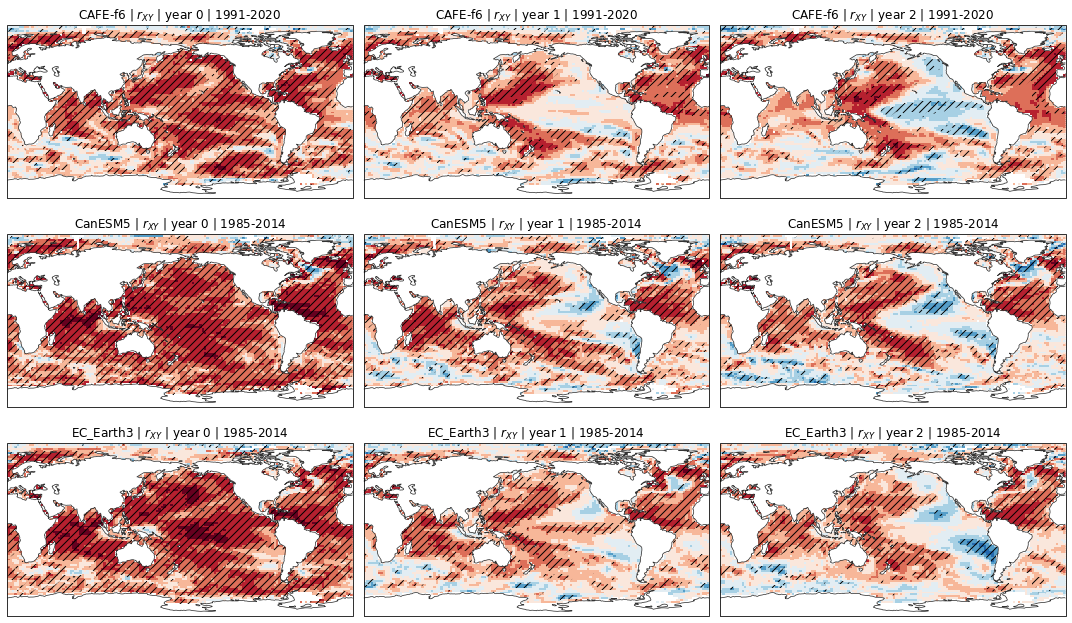

In [262]:
metric = "$r_{XY}$"

_ = plot.skill_maps(
    [
        [
            f6_annual_rXY.sel(lead=23),
            f6_4year_rXY.sel(lead=59),
            f6_4year_rXY.sel(lead=107),
        ],
        [
            can_annual_rXY.sel(lead=23),
            can_4year_rXY.sel(lead=59),
            can_4year_rXY.sel(lead=107),
        ],
        [
            ec_annual_rXY.sel(lead=23),
            ec_4year_rXY.sel(lead=59),
            ec_4year_rXY.sel(lead=107),
        ],
    ],
    variable="sst",
    vrange=(-1, 1),
    headings=[
        [
            f"CAFE-f6 | {metric} | year 1",
            f"CAFE-f6 | {metric} | years 1-4",
            f"CAFE-f6 | {metric} | years 5-8",
        ],
        [
            f"CanESM5 | {metric} | year 1",
            f"CanESM5 | {metric} | years 1-4",
            f"CanESM5 | {metric} | years 5-8",
        ],
        [
            f"EC_Earth3 | {metric} | year 1",
            f"EC_Earth3 | {metric} | years 1-4",
            f"EC_Earth3 | {metric} | years 5-8",
        ],
    ],
)